# Model: Random Forest

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Loading in Data

In [2]:
df = pd.read_excel('../top10_corr_features.xlsx')
df = df.drop(df.columns[0], axis = 1)

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [6]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Fitting and training
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Printing out Evaluation Metrics

In [7]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.50      0.33      0.40         9
         Buy       0.20      0.40      0.27         5
        Hold       0.00      0.00      0.00         3

    accuracy                           0.29        17
   macro avg       0.23      0.24      0.22        17
weighted avg       0.32      0.29      0.29        17



### Confusion Matrix

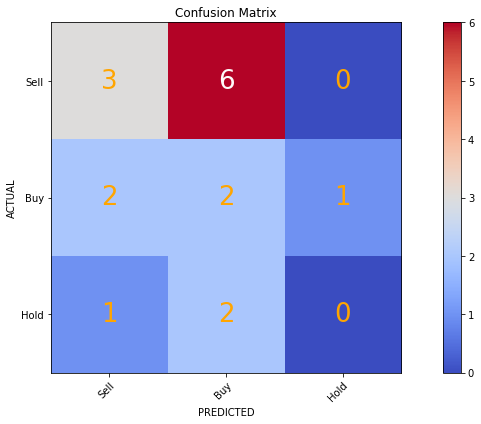

In [8]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [9]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [10]:
# Parameters to Tune
params = {'n_estimators': [10,50,100,200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 2, 5, 10],
          'min_samples_split': [5,10],
          'min_samples_leaf': [1, 2, 5]}

In [12]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.827, test=0.223), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.982, test=0.194), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.965, test=0.473), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.306), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.361), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.205), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.284), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_sam

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.214), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.961, test=0.237), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.966, test=0.441), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.208), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.671, test=0.229), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.672, test=0.227), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.779, test=0.238), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.765, test=0.262), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.756, test=0.243), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.948, test=0.256), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.782, test=0.306), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.701, test=0.317), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.876, test=0.208), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=1.000, test=0.378), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.894, test=0.309), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.798, test=0.339), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samp

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.928, test=0.268), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.965, test=0.091), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.863, test=0.237), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.966, test=0.338), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.948, test=0.256), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.916, test=0.212), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.966, test=0.249), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.256), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.765, test=0.262), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.781, test=0.260), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.723, test=0.339), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.756, test=0.260), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.857, test=0.256), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.601, test=0.262), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.609, test=0.226), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.798, test=0.269), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.782, test=0.237), total=   0.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.700, test=0.243), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.833, test=0.256), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.517, test=0.237), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.665, test=0.368), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.514, test=0.256), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samp

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.633, test=0.190), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.513, test=0.269), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.566, test=0.212), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.593, test=0.217), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.603, test=0.299), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.584, test=0.212), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.560, test=0.226), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.550, test=0.256), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.516, test=0.185), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.526, test=0.245), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.674, test=0.342), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.650, test=0.351), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.619, test=0.299), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.584, test=0.262), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.543, test=0.190), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.674, test=0.299), total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.566, test=0.233), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.593, test=0.284), total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.533, test=0.256), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.498, test=0.311), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.508, test=0.293), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.716, test=0.244), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.576, test=0.351), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.707, test=0.269), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.747, test=0.262), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.593, test=0.226), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.708, test=0.200), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.601, test=0.279), total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.610, test=0.268), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.531, test=0.183), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.498, test=0.227), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.564, test=0.361), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_sampl

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.577, test=0.243), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.499, test=0.208), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.567, test=0.306), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.560, test=0.284), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.512, test=0.183), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.567, test=0.279), total=   0.5s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.576, test=0.243), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.515, test=0.299), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.567, test=0.190), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.526, test=0.338), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.622, test=0.307), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_spl

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.531, test=0.256), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.584, test=0.262), total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.544, test=0.284), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.533, test=0.183), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.567, test=0.262), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.593, test=0.243), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.546, test=0.183), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.600, test=0.156), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.491, test=0.365), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.498, test=0.187), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_sampl

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.560, test=0.409), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.484, test=0.228), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.567, test=0.262), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.576, test=0.217), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.514, test=0.239), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.533, test=0.306), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.593, test=0.243), total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.515, test=0.256), total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.534, test=0.286), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.576, test=0.338), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.455, test=0.282), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_spl

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.527, test=0.292), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.498, test=0.228), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.567, test=0.262), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.650, test=0.226), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.499, test=0.183), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.566, test=0.212), total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.560, test=0.284), total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.499, test=0.208), total=   0.5s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.517, test=0.214), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.509, test=0.324), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.513, test=0.307), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.583, test=0.262), total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.526, test=0.161), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.533, test=0.183), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.515, test=0.262), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.527, test=0.284), total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.499, test=0.299), total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.566, test=0.262), total=   0.7s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.560, test=0.217), total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.499, test=0.208), total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.965, test=0.299), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.816, test=0.292), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.867, test=0.158), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_spl

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.961, test=0.287), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.292), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.982, test=0.214), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.961, test=0.262), total=   0.8s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.966, test=0.220), total=   0.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.965, test=0.299), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.809, test=0.223), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.859, test=0.490), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.564, test=0.107), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.720, test=0.233), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.892, test=0.220), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.895, test=0.299), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.782, test=0.190), total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.885, test=0.292), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.893, test=0.208), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.703, test=0.279), total=   1.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.883, test=0.243), total=   0.7s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.931, test=0.299), total=   1.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.829, test=0.317), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.857, test=0.256), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.929, test=0.339), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.863, test=0.172), total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.832, test=0.293), total=   0.2s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.965, test=0.299), total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.916, test=0.194), total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.966, test=0.320), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.965, test=0.208), total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.916, test=0.212), total=   1.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.928, test=0.217), total=   0.9s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.965, test=0.299), total=   0.7s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.743, test=0.472), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.650, test=0.256), total=   0.1s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.724, test=0.234), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.765, test=0.237), total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.650, test=0.284), total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.783, test=0.299), total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.600, test=0.306), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.773, test=0.293), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.833, test=0.256), total=   0.8s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.601, test=0.279), total=   1.4s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.773, test=0.284), total=   0.8s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.893, test=0.256), total=   1.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.567, test=0.343), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.543, test=0.256), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.514, test=0.315), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.549, test=0.306), total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.543, test=0.217), total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.673, test=0.228), total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.567, test=0.262), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.577, test=0.219), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.586, test=0.231), total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.566, test=0.212), total=   0.9s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.577, test=0.312), total=   1.4s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.635, test=0.256), total=   0.8s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.500, test=0.279), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.462, test=0.390), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.733, test=0.412), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.566, test=0.212), total=   0.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.650, test=0.243), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.717, test=0.299), total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.584, test=0.306), total=   0.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.543, test=0.217), total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.603, test=0.299), total=   0.4s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.584, test=0.306), total=   0.8s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.560, test=0.217), total=   0.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.515, test=0.299), total=   0.7s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.946, test=0.255), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.982, test=0.243), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.965, test=0.354), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_sam

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.966, test=0.389), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.256), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.961, test=0.217), total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.243), total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.256), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.531, test=0.304), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.831, test=0.245), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.767, test=0.238), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.765, test=0.222), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.833, test=0.198), total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.832, test=0.228), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.703, test=0.262), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.883, test=0.284), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.931, test=0.299), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.720, test=0.306), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.773, test=0.243), total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.896, test=0.256), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.961, test=0.269), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.948, test=0.270), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.930, test=0.307), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_sa

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.966, test=0.245), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.965, test=0.208), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.916, test=0.237), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.928, test=0.292), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.965, test=0.256), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.845, test=0.262), total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.966, test=0.292), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.208), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.696, test=0.217), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.667, test=0.270), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.798, test=0.307), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.815, test=0.220), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.831, test=0.228), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.686, test=0.212), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.700, test=0.268), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.858, test=0.256), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.703, test=0.237), total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.701, test=0.243), total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.833, test=0.208), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.531, test=0.252), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.566, test=0.322), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.583, test=0.156), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.559, test=0.317), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.708, test=0.154), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.583, test=0.262), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.593, test=0.217), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.620, test=0.299), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.566, test=0.262), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.593, test=0.226), total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.482, test=0.208), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.695, test=0.252), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.477, test=0.322), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.546, test=0.133), total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.667, test=0.217), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.496, test=0.299), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.551, test=0.237), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.576, test=0.268), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.531, test=0.299), total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.583, test=0.237), total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.560, test=0.256), total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.533, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.926, test=0.186), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.892, test=0.272), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=1.000, test=0.307), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, ma

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.961, test=0.212), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.361), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.187), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.237), total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.391), total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.473), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.828, test=0.333), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.759, test=0.269), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.782, test=0.217), total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.773, test=0.312), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.876, test=0.208), total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.600, test=0.262), total=   0.5s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.701, test=0.220), total=   0.6s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.875, test=0.208), total=   0.5s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.890, test=0.204), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.910, test=0.461), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.914, test=0.281), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entrop

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=1.000, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.961, test=0.170), total=   0.2s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.966, test=0.368), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.948, test=0.228), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.961, test=0.168), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.966, test=0.284), total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.208), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.686, test=0.262), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.671, test=0.158), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.808, test=0.174), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.798, test=0.198), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.892, test=0.339), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.600, test=0.212), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.883, test=0.217), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.858, test=0.316), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.702, test=0.212), total=   0.5s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.773, test=0.284), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.893, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.517, test=0.213), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.600, test=0.194), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.717, test=0.270), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entrop

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.637, test=0.356), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.567, test=0.212), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.781, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.533, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.566, test=0.190), total=   0.9s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.593, test=0.190), total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.604, test=0.256), total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.566, test=0.278), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.744, test=0.433), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.650, test=0.328), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.533, test=0.251), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.560, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.533, test=0.228), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.566, test=0.262), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.722, test=0.293), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.840, test=0.208), total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.583, test=0.237), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.739, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.781, test=0.208), total=   0.3s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.637, test=0.237), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.567, test=0.600), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.571, test=0.253), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.560, test=0.217), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=(train=0.652, test=0.275), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.550, test=0.237), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.577, test=0.217), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.706, test=0.299), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.765, test=0.237), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.593, test=0.190), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=0.708, test=0.256), total=   0.3s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.552, test=0.262), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.602, test=0.500), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.583, test=0.179), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.561, test=0.338), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.588, test=0.154), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.533, test=0.262), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.593, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.514, test=0.238), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.583, test=0.190), total=   0.3s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.593, test=0.190), total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.530, test=0.208), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.712, test=0.285), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.548, test=0.245), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.718, test=0.211), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samp

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.559, test=0.285), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=(train=0.603, test=0.230), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.600, test=0.306), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.667, test=0.284), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.586, test=0.269), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.601, test=0.251), total=   0.9s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.701, test=0.243), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.603, test=0.256), total=   0.3s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.649, test=0.314), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.593, test=0.178), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.649, test=0.355), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.566, test=0.237), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.507, test=0.322), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.517, test=0.208), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.584, test=0.279), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.667, test=0.243), total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.533, test=0.154), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.600, test=0.237), total=   0.3s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.684, test=0.243), total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.530, test=0.208), total=   0.3s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.515, test=0.212), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.478, test=0.232), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.497, test=0.183), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samp

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.688, test=0.413), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.531, test=0.183), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.583, test=0.279), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.560, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.517, test=0.299), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.549, test=0.190), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.560, test=0.217), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.484, test=0.208), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.517, test=0.311), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.476, test=0.191), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.500, test=0.187), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.559, test=0.243), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.531, test=0.183), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.533, test=0.306), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.560, test=0.217), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.517, test=0.154), total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.531, test=0.262), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.576, test=0.217), total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.515, test=0.158), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.917, test=0.304), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.930, test=0.466), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.916, test=0.208), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samp

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.190), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=0.966, test=0.467), total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.347), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.243), total=   0.7s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.600, test=0.333), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.849, test=0.391), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.948, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.601, test=0.306), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.609, test=0.217), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.893, test=0.208), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.600, test=0.237), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.833, test=0.198), total=   0.2s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.912, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.846, test=0.123), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.909, test=0.429), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.914, test=0.263), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samp

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.863, test=0.212), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.966, test=0.284), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.263), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.961, test=0.194), total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.928, test=0.268), total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.208), total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.713, test=0.156), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.880, test=0.218), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.861, test=0.532), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.893, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.600, test=0.262), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.832, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.893, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.703, test=0.286), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.773, test=0.220), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.816, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.550, test=0.263), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.633, test=0.222), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.659, test=0.183), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samp

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.577, test=0.380), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.587, test=0.299), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.583, test=0.237), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.831, test=0.249), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.750, test=0.231), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.600, test=0.262), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.559, test=0.217), total=   0.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.530, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.483, test=0.250), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.585, test=0.351), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.467, test=0.335), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, mi

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.684, test=0.243), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.749, test=0.208), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.549, test=0.262), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.593, test=0.268), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.514, test=0.231), total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.550, test=0.262), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.577, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.499, test=0.299), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.943, test=0.217), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.874, test=0.491), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=(train=0.930, test=0.351), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.217), total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.338), total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=(train=1.000, test=0.299), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.758, test=0.256), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.799, test=0.312), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=(train=0.724, test=0.370), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_dep

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.774, test=0.175), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=(train=0.876, test=0.238), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.600, test=0.279), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.817, test=0.338), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=(train=0.850, test=0.208), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.617, test=0.237), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.701, test=0.243), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=(train=0.893, test=0.256), total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.812, test=0.241), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.964, test=0.205), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, score=(train=0.884, test=0.253), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=10,

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=1.000, test=0.190), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.966, test=0.243), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=(train=0.965, test=0.307), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.961, test=0.262), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.966, test=0.268), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=(train=0.982, test=0.208), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.614, test=0.237), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.695, test=0.379), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, score=(train=0.767, test=0.170), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_dep

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.798, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, score=(train=0.800, test=0.208), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.583, test=0.237), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.701, test=0.226), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=(train=0.751, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.702, test=0.212), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.684, test=0.243), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=(train=0.867, test=0.256), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.566, test=0.212), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.493, test=0.222), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=(train=0.732, test=0.205), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=10,

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=(train=0.734, test=0.234), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.566, test=0.262), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.560, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=0.732, test=0.299), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.567, test=0.212), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.684, test=0.217), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200, score=(train=0.748, test=0.208), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.534, test=0.190), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.561, test=0.249), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=(train=0.603, test=0.137), total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_dep

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.739, test=0.256), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=(train=0.531, test=0.208), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.514, test=0.262), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.684, test=0.243), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=(train=0.639, test=0.133), total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200 


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.601, test=0.262), total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.667, test=0.190), total=   0.2s

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=0.732, test=0.208), total=   0.2s


C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:  1.8min finished
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

### Tuned Results

In [13]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.7203914228564962
Mean Testing Score: 1.0

Best Parameter Found:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

### Model with the Best Parameters

In [14]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Results from Optimum Parameters

In [15]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.62      0.56      0.59         9
         Buy       0.44      0.80      0.57         5
        Hold       0.00      0.00      0.00         3

    accuracy                           0.53        17
   macro avg       0.36      0.45      0.39        17
weighted avg       0.46      0.53      0.48        17



C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix for Optimum Parameters

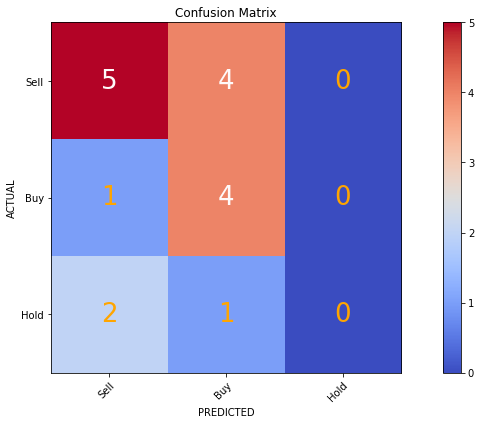

In [16]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()